In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
import seaborn as sns

## Load Data

In [6]:
loandata = pd.read_csv('loan_2017.csv')

C:\Users\nadel\AppData\Local\Temp\ipykernel_21100\3007412337.py:1: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  loandata = pd.read_csv('loan_2017.csv')


In [7]:
loandata.head()

,secappopenactil,bcopentobuy,initialliststatus,numactvbctl,grade,mthssincelastrecord,totcurbal,secappnumrevaccts,secappmthssincelastmajorderog,subgrade,...,totalcutl,mthssincelastmajorderog,numtloppast12m,percentbcgt75,pubrecbankruptcies,ilutil,secappinqlast6mths,purpose,issued,loanstatus
0,NaN,2661.0,w,1.0,B,NaN,20805.0,NaN,NaN,B3,...,0.0,NaN,0.0,100.0,0.0,50.0,NaN,debt_consolidation,Mar-2017,Fully Paid
1,NaN,2798.0,w,1.0,C,NaN,35225.0,NaN,NaN,C2,...,2.0,NaN,4.0,0.0,0.0,91.0,NaN,credit_card,Mar-2017,Current
2,NaN,7699.0,f,2.0,A,NaN,146116.0,NaN,NaN,A1,...,1.0,NaN,0.0,0.0,0.0,75.0,NaN,debt_consolidation,Mar-2017,Fully Paid
3,NaN,11247.0,w,1.0,C,90.0,10773.0,NaN,NaN,C1,...,0.0,NaN,0.0,16.7,1.0,73.0,NaN,debt_consolidation,Mar-2017,Charged Off
4,NaN,14163.0,f,5.0,B,NaN,490036.0,NaN,NaN,B3,...,0.0,NaN,2.0,16.7,0.0,102.0,NaN,debt_consolidation,Mar-2017,Fully Paid


In [8]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443579 entries, 0 to 443578
Columns: 108 entries, secappopenactil to loanstatus
dtypes: float64(88), int64(1), object(19)
memory usage: 365.5+ MB


## Select Data

In [9]:
# Copied features from EDA
all_null_feature =['memberid', 'desc']

In [10]:
ob_feature=['initialliststatus',
 'grade',
 'subgrade',
 'verificationstatusjoint',
 'earliestcrline',
 'applicationtype',
 'intrate',
 'term',
 'homeownership',
 'addrstate',
 'secappearliestcrline',
 'revolutil',
 'zipcode',
 'verificationstatus',
 'emptitle',
 'emplength',
 'purpose',
 'issued',
 'loanstatus']

In [11]:
num_feature=['secappopenactil',
 'bcopentobuy',
 'numactvbctl',
 'mthssincelastrecord',
 'totcurbal',
 'secappnumrevaccts',
 'secappmthssincelastmajorderog',
 'secappcollections12mthsexmed',
 'mosinrcnttl',
 'openrv12m',
 'inqlast12m',
 'mortacc',
 'mthssincelastdelinq',
 'numactvrevtl',
 'tothicredlim',
 'revolbaljoint',
 'ficorangehigh',
 'maxbalbc',
 'openil24m',
 'numbctl',
 'totalrevhilim',
 'totcollamt',
 'secappopenacc',
 'numtl120dpd2m',
 'secappficorangelow',
 'totalbalexmort',
 'annualincjoint',
 'ficorangelow',
 'totalacc',
 'mthssincerecentbcdlq',
 'installment',
 'numrevaccts',
 'pubrec',
 'accopenpast24mths',
 'numoprevtl',
 'avgcurbal',
 'secappmortacc',
 'openactil',
 'dti',
 'openacc6m',
 'totalbalil',
 'delinq2yrs',
 'fundedamnt',
 'mosinoldilacct',
 'annualinc',
 'inqfi',
 'numtl30dpd',
 'loanamnt',
 'numsats',
 'mthssincerecentrevoldelinq',
 'mthssincerecentbc',
 'id',
 'secappchargeoffwithin12mths',
 'revolbal',
 'inqlast6mths',
 'mthssincercntil',
 'openrv24m',
 'secapprevolutil',
 'totalilhighcreditlimit',
 'collections12mthsexmed',
 'chargeoffwithin12mths',
 'numtl90gdpd24m',
 'delinqamnt',
 'mosinoldrevtlop',
 'secappficorangehigh',
 'taxliens',
 'numbcsats',
 'totalbclimit',
 'dtijoint',
 'numacctsever120pd',
 'accnowdelinq',
 'openil12m',
 'pcttlnvrdlq',
 'bcutil',
 'mthssincerecentinq',
 'numiltl',
 'mosinrcntrevtlop',
 'allutil',
 'openacc',
 'numrevtlbalgt0',
 'totalcutl',
 'mthssincelastmajorderog',
 'numtloppast12m',
 'percentbcgt75',
 'pubrecbankruptcies',
 'ilutil',
 'secappinqlast6mths']

In [12]:
select_feature= ob_feature + num_feature
len(select_feature)

106

In [13]:
# remove 'id' from num_feature since it is not a feature for Loan status
num_feature.remove('id')

In [14]:
# remove fundedamnt since it always equals to 1 for issued loans and varied during different time of a current loan

num_feature.remove('fundedamnt')


In [15]:
# remove 'issued' and 'loanstatus' from ob_feature, since they are train/test flag and target

ob_feature.remove('loanstatus')
ob_feature.remove('issued')


In [16]:
select_feature=ob_feature+num_feature
len(select_feature)

102

In [17]:

df=loandata[select_feature+['id','loanstatus','issued']]

In [18]:
df.shape

(443579, 105)

In [19]:
df.head()

,initialliststatus,grade,subgrade,verificationstatusjoint,earliestcrline,applicationtype,intrate,term,homeownership,addrstate,...,totalcutl,mthssincelastmajorderog,numtloppast12m,percentbcgt75,pubrecbankruptcies,ilutil,secappinqlast6mths,id,loanstatus,issued
0,w,B,B3,NaN,Apr-1973,Individual,11.39%,36 months,RENT,FL,...,0.0,NaN,0.0,100.0,0.0,50.0,NaN,99892449,Fully Paid,Mar-2017
1,w,C,C2,NaN,Dec-2006,Individual,13.49%,36 months,RENT,CA,...,2.0,NaN,4.0,0.0,0.0,91.0,NaN,104060216,Current,Mar-2017
2,f,A,A1,NaN,Apr-2006,Individual,5.32%,36 months,MORTGAGE,GA,...,1.0,NaN,0.0,0.0,0.0,75.0,NaN,103347407,Fully Paid,Mar-2017
3,w,C,C1,NaN,May-1990,Individual,12.74%,60 months,RENT,WA,...,0.0,NaN,0.0,16.7,1.0,73.0,NaN,103952006,Charged Off,Mar-2017
4,f,B,B3,NaN,Dec-1998,Individual,11.39%,60 months,MORTGAGE,CT,...,0.0,NaN,2.0,16.7,0.0,102.0,NaN,103470623,Fully Paid,Mar-2017


## Only use term=36 months and loanstatus = fully paid and charged off

In [20]:
# We select the data(rows) that loanstatus is either FULL_PAID or CHARGED_OFF
df = df.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off' ")
df.shape

(326464, 105)

In [21]:
df = df.query("term ==' 36 months'")
df.shape

(257776, 105)

In [22]:
# We dont need the term colun since we only care 36 month loan
ob_feature.remove('term')

## Label Target

In [23]:
# Label the target
df['loanstatus'] = df.loanstatus.map({"Charged Off": 1, "Fully Paid": 0})

In [24]:
df['loanstatus'].value_counts()

0    214502
1     43274
Name: loanstatus, dtype: int64

In [25]:
print (df.loanstatus.value_counts(normalize=True))

0    0.832126
1    0.167874
Name: loanstatus, dtype: float64


## Out of time testing set and in-time training set: Oct~Dec as test

In [26]:
issued=list(df['issued'].unique())
issued

['Mar-2017',
 'Feb-2017',
 'Jan-2017',
 'Jun-2017',
 'May-2017',
 'Apr-2017',
 'Sep-2017',
 'Aug-2017',
 'Jul-2017',
 'Dec-2017',
 'Nov-2017',
 'Oct-2017']

In [27]:
df['train_flg'] = df.issued.apply(lambda x: 0 if x in issued[9:] else 1)
df.train_flg.value_counts()

1    206409
0     51367
Name: train_flg, dtype: int64

## Feature Engineering & Cleaning

#### Datetime to numeric feature

In [28]:
df.earliestcrline.unique()[:5]

array(['Apr-1973', 'Apr-2006', 'Apr-2007', 'Jan-2004', 'Oct-1994'],
      dtype=object)

In [29]:
# convert to number of months to Dec 2017
cl_month=df.earliestcrline.apply(lambda x: x.split('-')[0])
cl_year=df.earliestcrline.apply(lambda x: int(x.split('-')[1]))

In [30]:
cl_month.unique()

array(['Apr', 'Jan', 'Oct', 'Aug', 'Jun', 'Sep', 'May', 'Dec', 'Mar',
       'Nov', 'Jul', 'Feb'], dtype=object)

In [31]:
cl_year.unique()

array([1973, 2006, 2007, 2004, 1994, 2000, 1995, 2005, 2009, 2002, 1996,
       1997, 2001, 1974, 1987, 1989, 1992, 2003, 1999, 1980, 1993, 1998,
       2011, 1979, 2010, 1988, 2008, 1991, 2013, 1983, 1990, 1981, 2012,
       1982, 1976, 1985, 1986, 1984, 1977, 1969, 1966, 1975, 2014, 1978,
       1971, 1968, 1972, 1960, 1967, 1970, 1965, 1964, 1963, 1961, 1958,
       1952, 1959, 1953, 1956, 1962, 1950, 1934, 1957, 1951, 1954],
      dtype=int64)

In [32]:
dic_month= {'Jan':11,'Feb':10,'Mar':9,'Apr':8, 'May':7, 'Jun':6, 'Jul':5, 'Aug':4, 'Sep':3, 'Oct':2, 'Nov':1, 'Dec':0}

In [33]:
df['earliestcrline_month']=df.earliestcrline.apply(lambda x: (2017-int(x.split('-')[1]))*12+dic_month[x.split('-')[0]])

In [34]:
df.earliestcrline_month[:5]

0    536
2    140
5    128
6    167
7    278
Name: earliestcrline_month, dtype: int64

In [35]:
num_feature.append('earliestcrline_month')
ob_feature.remove('earliestcrline')

In [36]:
print (len(ob_feature), len(num_feature))

15 86


'secappearliestcrline'

In [37]:
df.secappearliestcrline.unique()[:5]

array([nan, 'Jun-2002', 'May-1996', 'Sep-1999', 'Nov-2004'], dtype=object)

In [38]:
# fillna
df.secappearliestcrline.fillna(value='Dec-2020',inplace=True)

In [39]:
# convert to number of months to Dec 2017
cl_month=df.secappearliestcrline.apply(lambda x: x.split('-')[0])
cl_year=df.secappearliestcrline.apply(lambda x: int(x.split('-')[1]))

In [40]:
cl_month.unique()

array(['Dec', 'Jun', 'May', 'Sep', 'Nov', 'Jan', 'Mar', 'Jul', 'Feb',
       'Aug', 'Oct', 'Apr'], dtype=object)

In [41]:
# there are year 2020
cl_year.unique()

array([2020, 2002, 1996, 1999, 2004, 2012, 1990, 1993, 1998, 2009, 2011,
       1981, 1987, 2001, 1997, 1995, 1992, 1988, 1994, 2006, 1985, 2005,
       2000, 1975, 2007, 1984, 1972, 2013, 2008, 2003, 2014, 2015, 1973,
       1974, 1983, 1991, 2010, 2016, 1989, 1979, 1986, 1980, 1982, 1977,
       1965, 1934, 1969, 1976, 1978, 1964, 1970, 1968, 2017, 1971, 1962,
       1951, 1967, 1966], dtype=int64)

In [42]:
dic_month= {'Jan':11,'Feb':10,'Mar':9,'Apr':8, 'May':7, 'Jun':6, 'Jul':5, 'Aug':4, 'Sep':3, 'Oct':2, 'Nov':1, 'Dec':0}

In [43]:
df['secappearliestcrline_month']=df.secappearliestcrline.apply(lambda x: (2017-int(x.split('-')[1]))*12+dic_month[x.split('-')[0]])

In [44]:
df.secappearliestcrline_month[:5]

0   -36
2   -36
5   -36
6   -36
7   -36
Name: secappearliestcrline_month, dtype: int64

In [45]:
num_feature.append('secappearliestcrline_month')
ob_feature.remove('secappearliestcrline')

In [46]:
print (len(ob_feature), len(num_feature))

14 87


### emplength to numeric feature

In [47]:
print (df['emplength'].isnull().sum())
df['emplength'].unique()

19716


array([nan, '10+ years', '4 years', '1 year', '3 years', '6 years',
       '5 years', '8 years', '2 years', '< 1 year', '9 years', '7 years'],
      dtype=object)

In [48]:
df['emplength'].replace('n/a', np.nan, inplace=True)
df['emplength'].replace('< 1 year', '0', inplace=True)
df['emplength'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df.emplength.fillna(value=-999,inplace=True)
df['emplength'] = df['emplength'].astype(int)

In [49]:
df.emplength.value_counts()

 10     81537
 2      24787
 0      23735
 3      21620
-999    19716
 1      17700
 4      16160
 5      15803
 6      11156
 7       9229
 9       8629
 8       7704
Name: emplength, dtype: int64

In [50]:
num_feature.append('emplength')
ob_feature.remove('emplength')
print (len(num_feature), len(ob_feature))

88 13


## % to numeric feature: intrate, revolutil

In [51]:
intrate=df.intrate.apply(lambda x: float(x.replace('%','')))

In [52]:
df.intrate=intrate
df.intrate[:2]

0    11.39
2     5.32
Name: intrate, dtype: float64

In [53]:
df.revolutil[:3]

0    41.7%
2    34.5%
5    48.5%
Name: revolutil, dtype: object

In [54]:
revolutil=df.revolutil.apply(lambda x: str(x).replace('%','')).astype(float)

In [55]:
df.revolutil=revolutil
df.revolutil[:2]

0    41.7
2    34.5
Name: revolutil, dtype: float64

In [56]:
ob_feature.remove('intrate')
num_feature.append('intrate')
ob_feature.remove('revolutil')
num_feature.append('revolutil')

In [57]:
print (len(ob_feature), len(num_feature))

11 90


#### Ordinal feature encoding : grade, subgrade

In [58]:
Dic_grade = {"A": 1, 
            "B": 2, 
            "C": 3, 
            "D": 4, 
            "E": 5,
            "F": 6, 
            "G": 7}

In [59]:
df.grade = df.grade.map(Dic_grade)

In [60]:
df.subgrade = df.subgrade.apply(lambda x: (Dic_grade[x[0]] - 1) * 5 + int(x[1]))

In [61]:
ob_feature.remove('grade')
num_feature.append('grade')
ob_feature.remove('subgrade')
num_feature.append('subgrade')

In [62]:
print (len(ob_feature), len(num_feature))

9 92


### High cardinality feature encoding

###### Zip Code - frequency encoding 

In [63]:
print (df.zipcode.nunique(), df.zipcode.unique()[:5])

892 ['329xx' '307xx' '021xx' '433xx' '301xx']


In [64]:
# convert zipcode to int; Note: there is a Nan in this feature.
df.zipcode.fillna(value='000xx',inplace=True)
df.zipcode = df.zipcode.apply(lambda x: int(x[0:3]))


In [65]:
df.zipcode[:5]

0    329
2    307
5     21
6    433
7    301
Name: zipcode, dtype: int64

In [66]:
zipcode_freq = df.groupby("zipcode").size().reset_index()

In [67]:
zipcode_freq[:5]

,zipcode,0
0,0,1
1,8,2
2,10,402
3,11,141
4,12,97


In [68]:
zipcode_freq.columns = ["zipcode", "zipcode_freq"]

In [69]:
df = pd.merge(df, zipcode_freq, how = "left", on = "zipcode")

In [70]:
df.zipcode_freq[:5]

0     581
1     221
2    1215
3     131
4    1198
Name: zipcode_freq, dtype: int64

In [71]:
ob_feature.remove('zipcode')
num_feature.append('zipcode')
num_feature.append('zipcode_freq')
print (len(ob_feature), len(num_feature))

8 94


In [72]:
df[df.zipcode==329].count()

initialliststatus             581
grade                         581
subgrade                      581
verificationstatusjoint        42
earliestcrline                581
                             ... 
issued                        581
train_flg                     581
earliestcrline_month          581
secappearliestcrline_month    581
zipcode_freq                  581
Length: 109, dtype: int64

### emptitle-frequency encoding (can do some NLP for later stage)

In [73]:
emptitle_freq = df.groupby("emptitle").size().reset_index()
emptitle_freq.columns = ["emptitle", "emptitle_freq"]
df = pd.merge(df, emptitle_freq, how = "left", on = "emptitle")


In [74]:
ob_feature.remove('emptitle')
num_feature.append('emptitle_freq')
print (len(ob_feature), len(num_feature))

7 95


###### Addr_state - frequency encoding

In [75]:
addrstate_freq = df.groupby("addrstate").size().reset_index()
addrstate_freq.columns = ["addrstate", "addrstate_freq"]
df = pd.merge(df, addrstate_freq, how = "left", on = "addrstate")


In [76]:
ob_feature.remove('addrstate')
num_feature.append('addrstate_freq')
print (len(ob_feature), len(num_feature))

6 96


#### One hot encoding

In [77]:
print (ob_feature)

['initialliststatus', 'verificationstatusjoint', 'applicationtype', 'homeownership', 'verificationstatus', 'purpose']


In [78]:
dummy_feature = ["homeownership", "verificationstatus",'verificationstatusjoint', "purpose", 'applicationtype',"initialliststatus"]

In [79]:
df_dummy = pd.get_dummies(df[dummy_feature])

In [80]:
OHE_feature=list(df_dummy.columns.values)

In [81]:
len(OHE_feature)
df_dummy

,homeownership_ANY,homeownership_MORTGAGE,homeownership_NONE,homeownership_OWN,homeownership_RENT,verificationstatus_Not Verified,verificationstatus_Source Verified,verificationstatus_Verified,verificationstatusjoint_Not Verified,verificationstatusjoint_Source Verified,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,applicationtype_Individual,applicationtype_Joint App,initialliststatus_f,initialliststatus_w
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257771,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
257772,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
257773,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
257774,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [82]:
df=pd.concat([df,df_dummy], axis=1 )

In [83]:
df.shape

(257776, 139)

In [84]:
for feat in dummy_feature:
    
    ob_feature.remove(feat)

In [85]:
len(ob_feature)

0

In [86]:
select_feature=num_feature+OHE_feature

In [87]:
len(select_feature)

124

In [89]:
df

,initialliststatus,grade,subgrade,verificationstatusjoint,earliestcrline,applicationtype,intrate,term,homeownership,addrstate,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,applicationtype_Individual,applicationtype_Joint App,initialliststatus_f,initialliststatus_w
0,w,2,8,NaN,Apr-1973,Individual,11.39,36 months,RENT,FL,...,0,0,0,0,0,0,1,0,0,1
1,f,1,1,NaN,Apr-2006,Individual,5.32,36 months,MORTGAGE,GA,...,0,0,0,0,0,0,1,0,1,0
2,f,1,4,NaN,Apr-2007,Individual,7.49,36 months,RENT,MA,...,0,0,0,0,0,0,1,0,1,0
3,f,1,5,NaN,Jan-2004,Individual,7.99,36 months,RENT,OH,...,0,0,0,0,0,0,1,0,1,0
4,w,1,2,NaN,Oct-1994,Individual,6.99,36 months,MORTGAGE,GA,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257771,f,4,16,NaN,Jan-2002,Individual,17.09,36 months,MORTGAGE,VA,...,0,0,0,0,0,0,1,0,1,0
257772,f,4,20,NaN,Nov-1997,Individual,21.45,36 months,MORTGAGE,IL,...,0,0,0,0,0,0,1,0,1,0
257773,w,2,6,NaN,Mar-1992,Individual,9.44,36 months,MORTGAGE,AL,...,0,0,0,0,0,0,1,0,0,1
257774,w,3,12,NaN,Dec-2005,Individual,13.59,36 months,MORTGAGE,FL,...,0,0,0,0,0,0,1,0,0,1


##  XGBoost 

In [90]:
feat=select_feature
print (feat)

['secappopenactil', 'bcopentobuy', 'numactvbctl', 'mthssincelastrecord', 'totcurbal', 'secappnumrevaccts', 'secappmthssincelastmajorderog', 'secappcollections12mthsexmed', 'mosinrcnttl', 'openrv12m', 'inqlast12m', 'mortacc', 'mthssincelastdelinq', 'numactvrevtl', 'tothicredlim', 'revolbaljoint', 'ficorangehigh', 'maxbalbc', 'openil24m', 'numbctl', 'totalrevhilim', 'totcollamt', 'secappopenacc', 'numtl120dpd2m', 'secappficorangelow', 'totalbalexmort', 'annualincjoint', 'ficorangelow', 'totalacc', 'mthssincerecentbcdlq', 'installment', 'numrevaccts', 'pubrec', 'accopenpast24mths', 'numoprevtl', 'avgcurbal', 'secappmortacc', 'openactil', 'dti', 'openacc6m', 'totalbalil', 'delinq2yrs', 'mosinoldilacct', 'annualinc', 'inqfi', 'numtl30dpd', 'loanamnt', 'numsats', 'mthssincerecentrevoldelinq', 'mthssincerecentbc', 'secappchargeoffwithin12mths', 'revolbal', 'inqlast6mths', 'mthssincercntil', 'openrv24m', 'secapprevolutil', 'totalilhighcreditlimit', 'collections12mthsexmed', 'chargeoffwithin12m

### Preliminary manually parameter tuning based on stratified train-test split

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
print(df.query("train_flg == 1"))

       initialliststatus  grade  subgrade verificationstatusjoint  \
0                      w      2         8                     NaN   
1                      f      1         1                     NaN   
2                      f      1         4                     NaN   
3                      f      1         5                     NaN   
4                      w      1         2                     NaN   
...                  ...    ...       ...                     ...   
206404                 w      5        25                     NaN   
206405                 w      5        22                     NaN   
206406                 w      5        22                     NaN   
206407                 w      5        24                     NaN   
206408                 w      7        35                     NaN   

       earliestcrline applicationtype  intrate        term homeownership  \
0            Apr-1973      Individual    11.39   36 months          RENT   
1            Apr-20

In [93]:
print(df.query("train_flg == 0"))

       initialliststatus  grade  subgrade verificationstatusjoint  \
206409                 w      1         2                     NaN   
206410                 w      2        10                     NaN   
206411                 w      2         8                     NaN   
206412                 w      2         7                     NaN   
206413                 w      2         7                     NaN   
...                  ...    ...       ...                     ...   
257771                 f      4        16                     NaN   
257772                 f      4        20                     NaN   
257773                 w      2         6                     NaN   
257774                 w      3        12                     NaN   
257775                 w      1         5            Not Verified   

       earliestcrline applicationtype  intrate        term homeownership  \
206409       Nov-2005      Individual     6.08   36 months           OWN   
206410       Aug-19

In [94]:
df_train = df.query("train_flg == 1")
df_test =df.query("train_flg == 0" )

In [95]:
print (df_train.shape, df_test.shape)

(206409, 139) (51367, 139)


In [96]:
df_train[feat].shape

(206409, 124)

In [97]:
X_train, X_valid, y_train, y_valid = train_test_split(df_train[feat], df_train.loanstatus, 
                                                      test_size=0.3, random_state=2014, stratify = df_train.loanstatus )

In [98]:
X_test, y_test = df_test[feat], df_test.loanstatus

In [99]:
dtrain = xgb.DMatrix(X_train, y_train, missing = np.NAN)
dvalid = xgb.DMatrix(X_valid, y_valid, missing = np.NAN)
dtest = xgb.DMatrix(X_test, y_test, missing = np.NAN)

In [100]:
params = {"objective": "binary:logistic", 
          "booster" : "gbtree", 
          "eta": 0.05, 
          "max_depth": 6, 
          "subsample": 0.6, 
          "colsample_bytree": 0.7,
          #"colsample_bylevel": 0.6,
          "silent": 1, 
          "seed": 1234, 
          "eval_metric": "auc",
          #"gamma": 1, 
          "min_child_weight": 5} 

In [101]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
num_boost_round = 1500
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist,\
  early_stopping_rounds= 50)

[15:34:45] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-auc:0.68445	eval-auc:0.67752
[1]	train-auc:0.69323	eval-auc:0.68130
[2]	train-auc:0.70094	eval-auc:0.68884
[3]	train-auc:0.70313	eval-auc:0.69182
[4]	train-auc:0.70446	eval-auc:0.69301
[5]	train-auc:0.70522	eval-auc:0.69330
[6]	train-auc:0.70548	eval-auc:0.69384
[7]	train-auc:0.70607	eval-auc:0.69458
[8]	train-auc:0.70653	eval-auc:0.69499
[9]	train-auc:0.70685	eval-auc:0.69502
[10]	train-auc:0.70712	eval-auc:0.69553
[11]	train-auc:0.70763	eval-auc:0.69566
[12]	train-auc:0.70794	eval-auc:0.69595
[13]	train-auc:0.70800	eval-auc:0.69615
[14]	train-auc:0.70844	eval-auc:0.69642
[15]	train-auc:0.70858	eval-auc:0.69667
[16]	train-auc:0.70916	eval-auc:0.69691
[17]	train-auc:0.70933	eval-auc:0.69682
[18]	train-auc:0.70962	eval-auc:0.69680
[19]	train-auc:0.71011	eval-auc:0.69714
[20]	train-auc:0.71062	eval-auc:0.69740
[21]	train-auc:0.71089	eval-au

[200]	train-auc:0.76789	eval-auc:0.71209
[201]	train-auc:0.76801	eval-auc:0.71211
[202]	train-auc:0.76824	eval-auc:0.71209
[203]	train-auc:0.76835	eval-auc:0.71214
[204]	train-auc:0.76847	eval-auc:0.71214
[205]	train-auc:0.76871	eval-auc:0.71217
[206]	train-auc:0.76885	eval-auc:0.71214
[207]	train-auc:0.76904	eval-auc:0.71217
[208]	train-auc:0.76923	eval-auc:0.71219
[209]	train-auc:0.76939	eval-auc:0.71223
[210]	train-auc:0.76971	eval-auc:0.71228
[211]	train-auc:0.77005	eval-auc:0.71232
[212]	train-auc:0.77021	eval-auc:0.71232
[213]	train-auc:0.77036	eval-auc:0.71232
[214]	train-auc:0.77058	eval-auc:0.71228
[215]	train-auc:0.77084	eval-auc:0.71233
[216]	train-auc:0.77109	eval-auc:0.71234
[217]	train-auc:0.77129	eval-auc:0.71235
[218]	train-auc:0.77152	eval-auc:0.71237
[219]	train-auc:0.77166	eval-auc:0.71245
[220]	train-auc:0.77182	eval-auc:0.71246
[221]	train-auc:0.77185	eval-auc:0.71244
[222]	train-auc:0.77198	eval-auc:0.71245
[223]	train-auc:0.77215	eval-auc:0.71251
[224]	train-auc:

[400]	train-auc:0.80474	eval-auc:0.71356
[401]	train-auc:0.80495	eval-auc:0.71355
[402]	train-auc:0.80512	eval-auc:0.71354
[403]	train-auc:0.80538	eval-auc:0.71349
[404]	train-auc:0.80559	eval-auc:0.71346
[405]	train-auc:0.80583	eval-auc:0.71342
[406]	train-auc:0.80596	eval-auc:0.71343
[407]	train-auc:0.80612	eval-auc:0.71345
[408]	train-auc:0.80635	eval-auc:0.71351
[409]	train-auc:0.80641	eval-auc:0.71353
[410]	train-auc:0.80660	eval-auc:0.71352
[411]	train-auc:0.80669	eval-auc:0.71356
[412]	train-auc:0.80683	eval-auc:0.71352
[413]	train-auc:0.80703	eval-auc:0.71352
[414]	train-auc:0.80729	eval-auc:0.71354
[415]	train-auc:0.80732	eval-auc:0.71355
[416]	train-auc:0.80758	eval-auc:0.71349
[417]	train-auc:0.80781	eval-auc:0.71350
[418]	train-auc:0.80802	eval-auc:0.71353
[419]	train-auc:0.80815	eval-auc:0.71352
[420]	train-auc:0.80827	eval-auc:0.71352
[421]	train-auc:0.80855	eval-auc:0.71354
[422]	train-auc:0.80865	eval-auc:0.71352
[423]	train-auc:0.80873	eval-auc:0.71351
[424]	train-auc:

In [102]:
from sklearn.metrics import roc_curve, auc
from sklearn import linear_model, datasets
import pylab as pl
def draw_ROC(model, dtrain, dvalid, dtest, y_train, y_valid, y_test ):
    probas_ = model.predict(dvalid, ntree_limit=model.best_ntree_limit)
    probas_1 = model.predict(dtrain, ntree_limit=model.best_ntree_limit)
    probas_2 = model.predict(dtest, ntree_limit=model.best_ntree_limit)
    fpr, tpr, thresholds = roc_curve(y_valid, probas_)
    fpr_1, tpr_1, thresholds_1 = roc_curve(y_train, probas_1)
    fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, probas_2)
    roc_auc = auc(fpr, tpr)
    roc_auc_1 = auc(fpr_1, tpr_1)
    roc_auc_2 = auc(fpr_2, tpr_2)
    print ("Area under the ROC curve - validation: %f" % roc_auc)
    print ("Area under the ROC curve - train: %f" % roc_auc_1)
    print ("Area under the ROC curve - test: %f" % roc_auc_2)
    # Plot ROC curve
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, label='ROC curve - valid(AUC = %0.2f)' % roc_auc, color='r')
    plt.plot(fpr_1, tpr_1, label='ROC curve - train (AUC = %0.2f)' % roc_auc_1, color='b')
    plt.plot(fpr_2, tpr_2, label='ROC curve - test (AUC = %0.2f)' % roc_auc_2, color='g')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for lead score model')
    plt.legend(loc="lower right")
    plt.show()


### ROC curve

D:\anaconda3\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


Area under the ROC curve - validation: 0.713800
Area under the ROC curve - train: 0.822893
Area under the ROC curve - test: 0.716648


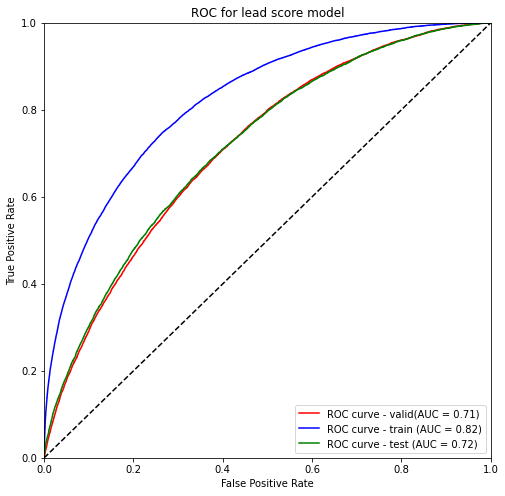

In [103]:
draw_ROC(gbm, dtrain, dvalid, dtest, y_train, y_valid, y_test)

### Distribution of predicted values

In [104]:
y_pred = gbm.predict(dtest)

In [105]:
X_test

,secappopenactil,bcopentobuy,numactvbctl,mthssincelastrecord,totcurbal,secappnumrevaccts,secappmthssincelastmajorderog,secappcollections12mthsexmed,mosinrcnttl,openrv12m,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,applicationtype_Individual,applicationtype_Joint App,initialliststatus_f,initialliststatus_w
206409,NaN,90826.0,7.0,NaN,708464.0,NaN,NaN,NaN,5.0,2.0,...,0,0,1,0,0,0,1,0,0,1
206410,NaN,270.0,2.0,79.0,154139.0,NaN,NaN,NaN,15.0,0.0,...,0,0,1,0,0,0,1,0,0,1
206411,NaN,2039.0,2.0,NaN,66150.0,NaN,NaN,NaN,17.0,0.0,...,0,0,0,0,0,0,1,0,0,1
206412,NaN,14570.0,4.0,NaN,45713.0,NaN,NaN,NaN,9.0,3.0,...,0,0,0,0,0,0,1,0,0,1
206413,NaN,135.0,2.0,NaN,45523.0,NaN,NaN,NaN,6.0,1.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257771,NaN,3825.0,8.0,60.0,240380.0,NaN,NaN,NaN,3.0,8.0,...,0,0,0,0,0,0,1,0,1,0
257772,NaN,5412.0,3.0,NaN,225104.0,NaN,NaN,NaN,6.0,1.0,...,0,0,0,0,0,0,1,0,1,0
257773,NaN,5600.0,3.0,NaN,206784.0,NaN,NaN,NaN,7.0,0.0,...,0,0,0,0,0,0,1,0,0,1
257774,NaN,9196.0,5.0,93.0,91745.0,NaN,NaN,NaN,17.0,0.0,...,0,0,0,0,0,0,1,0,0,1


In [106]:
y_test

206409    0
206410    0
206411    0
206412    0
206413    0
         ..
257771    1
257772    1
257773    0
257774    0
257775    0
Name: loanstatus, Length: 51367, dtype: int64

In [107]:
print (y_pred.max(), y_pred.min(), y_pred.mean())

0.8607946 0.0014641351 0.15927063


In [108]:
print (y_test.mean())

0.19105651488309616


In [109]:
print(y_train.mean())

0.1621056711376881


### Feature importance

In [110]:
importance=gbm.get_fscore()

In [111]:
df_importance = pd.DataFrame(importance.items(), columns=['feature', 'fscore'])
df_importance['fscore'] = df_importance['fscore'] / df_importance['fscore'].sum()

In [112]:
df_importance.sort_values(['fscore'], ascending=False, inplace=True)
df_importance

,feature,fscore
38,dti,0.032651
42,mosinoldilacct,0.029887
30,installment,0.028505
1,bcopentobuy,0.026259
94,emptitle_freq,0.026000
...,...,...
7,secappcollections12mthsexmed,0.000173
50,secappchargeoffwithin12mths,0.000086
68,accnowdelinq,0.000043
96,homeownership_ANY,0.000043


<Figure size 2304x2304 with 0 Axes>

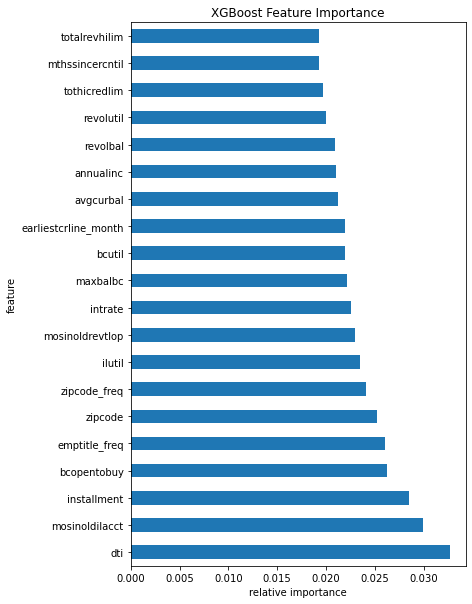

In [113]:
plt.figure(figsize=(32, 32))
# df_importance.plot()
df_importance[:20].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

In [114]:
grade_importance = df_importance.query("feature=='grade'")
grade_importance

,feature,fscore
90,grade,0.001641


In [115]:
subgrade_importance = df_importance.query("feature=='subgrade'")
subgrade_importance

,feature,fscore
91,subgrade,0.007169


In [116]:
intrate_importance = df_importance.query("feature=='intrate'")
intrate_importance

,feature,fscore
88,intrate,0.022545


In [117]:
df_importance.query("feature=='loanamnt'")

,feature,fscore
46,loanamnt,0.019003


Text(0.5, 0, 'relative importance')

<Figure size 2304x2304 with 0 Axes>

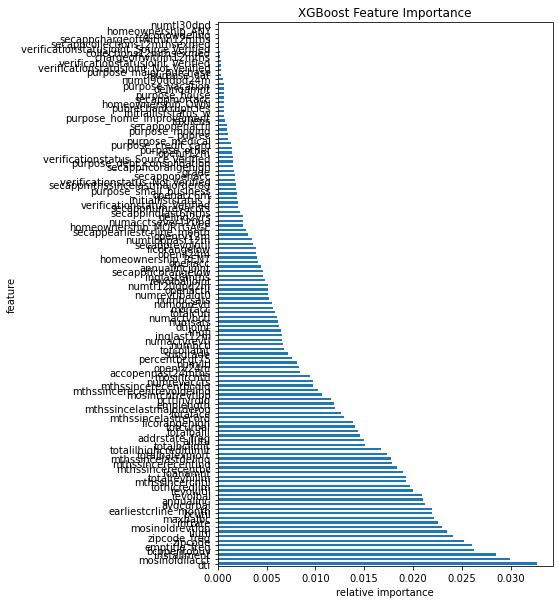

In [118]:
plt.figure(figsize=(32, 32))
# df_importance.plot()
df_importance.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

## Save model

In [126]:
import pickle
pickle.dump(gbm, open('model.pkl', "wb"))

In [127]:
import joblib
joblib.dump(gbm, "pima.joblib.dat")

['pima.joblib.dat']

Todo:<br>
Hyperparameter turning

In [145]:
import os

scores = {} # scores is an empty dict already

if os.path.getsize('model.pkl') > 0:      
    with open('model.pkl', "rb") as f:
        unpickler = pickle.Unpickler(f)
        # if file is not empty scores will be equal
        # to the value unpickled
        scores = unpickler.load()

In [146]:
scores

In [148]:
y_pred.max()

0.8607946

In [ ]:
import pickle
import pandas as pd

# Load the saved model
with open('model.pkl', 'rb') as file:
    loaded_gbm = pickle.load(file)

# Create a sample input DataFrame (make sure the columns match the input data used to train the model)
sample_input = pd.DataFrame({
    'column1': [value1],
    'column2': [value2],
    # ... (add more columns as needed)
})

# Use the loaded model to make predictions
predictions = scores.predict(sample_input)

# Print the predictions
print(predictions)


In [155]:
df

,initialliststatus,grade,subgrade,verificationstatusjoint,earliestcrline,applicationtype,intrate,term,homeownership,addrstate,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,applicationtype_Individual,applicationtype_Joint App,initialliststatus_f,initialliststatus_w
0,w,2,8,NaN,Apr-1973,Individual,11.39,36 months,RENT,FL,...,0,0,0,0,0,0,1,0,0,1
1,f,1,1,NaN,Apr-2006,Individual,5.32,36 months,MORTGAGE,GA,...,0,0,0,0,0,0,1,0,1,0
2,f,1,4,NaN,Apr-2007,Individual,7.49,36 months,RENT,MA,...,0,0,0,0,0,0,1,0,1,0
3,f,1,5,NaN,Jan-2004,Individual,7.99,36 months,RENT,OH,...,0,0,0,0,0,0,1,0,1,0
4,w,1,2,NaN,Oct-1994,Individual,6.99,36 months,MORTGAGE,GA,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257771,f,4,16,NaN,Jan-2002,Individual,17.09,36 months,MORTGAGE,VA,...,0,0,0,0,0,0,1,0,1,0
257772,f,4,20,NaN,Nov-1997,Individual,21.45,36 months,MORTGAGE,IL,...,0,0,0,0,0,0,1,0,1,0
257773,w,2,6,NaN,Mar-1992,Individual,9.44,36 months,MORTGAGE,AL,...,0,0,0,0,0,0,1,0,0,1
257774,w,3,12,NaN,Dec-2005,Individual,13.59,36 months,MORTGAGE,FL,...,0,0,0,0,0,0,1,0,0,1


In [157]:
df[:10].to_csv('dataframe.csv', index=False)

In [164]:
df1 = pd.read_csv('dataframe.csv')

In [165]:
# Convert the DataFrame to a DMatrix object
dmatrix_data = xgb.DMatrix(df1[feat])

# Make predictions using the DMatrix object
predictions = scores.predict(dmatrix_data)

# Print the predictions
print(predictions)


[0.2623986]


In [167]:
prediction = float(predictions)

prediction={'high risk': round(prediction, 2),
                        'safe': round(1 - prediction, 2),
                        }

In [168]:
print(prediction)

{'high risk': 0.26, 'safe': 0.74}


In [9]:
import ipysheet
import ipywidgets

In [12]:
sheet=ipysheet.sheet(columns=)
sheet

Sheet(columns=9, layout=Layout(height='auto', width='auto'), rows=5)

In [14]:
cell1=ipysheet.cell(row=1,column=1)

In [23]:
def get_info():
    info=[]
    int_rate=input('int_rate=')
    loan_amnt=input('loan_amnt')
    term=input('')
    fund_rate=input('')
    bc_open_to_buy=input('')
    total_il_high_credit_limit=input('')
    dti=input('')
    annual_inc=input('')
    bc_util=input('')
    info.append(int_rate)
    info.append(loan_amnt)
    info.append(term)
    info.append(fund_rate)
    info.append(bc_open_to_buy)
    info.append(total_il_high_credit_limit)
    info.append(dti)
    info.append(annual_inc)
    info.append(bc_util)
    return info
    

In [24]:
info=get_info()
print(info)

int_rate=1
loan_amnt2
3
4
5
6
7
8
9


['1', '2', '3', '4', '5', '6', '7', '8', '9']